### Case Study 4 :  Data Science Shark Tank

***Due Date: December 3, 2025 before 11:59pm***

Note:
    
***part_1 and part_3 of Problem_1, and links to datasets (or API you are planning to use) should be sent to me by email (tghoshal@wpi.edu) before 11:59pm on November 11. Without this step, your project may not be approved for presentation on April 23.You must CC all your group members in that email.***

***On November 13, we will have an 'Elevator Pitch' session.***

also NOTE:

1. There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!

2. We may collect feedback after your submission to understand everyone's contributions. The feedback may affect your grade.


In [8]:
'''





'''

'\n\n\n\n\n\n'

### Introduction

After the previous 3 case studies,  your are now equipped with three powerful skills of an effective data scientist: ***data gathering, model development, exploratory data analysis***. In this case study, your team is going to act like a data science team in a mid-size company. Your team will make use of these skills to come up with an idea for a new data science project, covince senior executives of the idea to get funding/ financial resources using data driven presentations, and finally build a prototype model for use by another team within the company.

Your team needs to decide which business problem is important for the market your company is in (for example, social media market, housing market, search market, etc.). Then use data science approaches to gather data, explore the data, tie with business needs, make conjectures, develop models etc.

The solution should include some key components of data science:

    1) the business part to analyze the potential impact of your new/improved service, why the idea can make money, how are you planning to persuade senior executives (e.g. seniors VPS/ CEO/ COO) to allocate money for your project
    
    2) collect data, perform exploratory data analysis, make conjectures in support of the business plan made in the previous step.
    
    3) Use one of your conjectures from step 2 as the motivation for developing a model. Use appropriate features from your data and build the model.

NOTE, as opposed to the first three case studies, case study 4 is much much more open ended. A more complex model does not mean a better project. Also, strong exploratory data analysis loosely tied with the business question also does not mean a better project. Try to make all parts coherent so that they collectively tell one story.

# Background (Elevator Pitch)

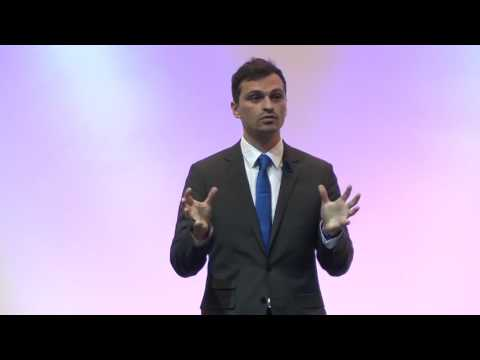

In [9]:
# Should your project presentation be like this?

from IPython.display import YouTubeVideo
YouTubeVideo("7a_lu7ilpnI")

## Some Resources


**Optional Readings:**


**APIs**
* Zillow API: https://pypi.python.org/pypi/pyzillow
* Google Map API: https://developers.google.com/api-client-library/python/apis/mapsengine/v1?hl=en
* More APIs: https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition

**Python libraries you may want to use:**
* Scikit-learn (http://scikit-learn.org): machine learning tools in Python.

**Data sources:**
* UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/
* Statlib datasets: http://lib.stat.cmu.edu/datasets/
* Kaggel: www.kaggle.com
* Open Gov. Data: www.data.gov, www.data.gov.uk, https://www.data.gouv.fr/fr/, https://www.oecd.org/gov/digital-government/open-government-data.htm




### Problem 1: the Business Part (20 points)
 As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on. Pick one of the markets for further consideration, and propose a new data science project which you believe will be important for your company to do well in the market. Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve.
Why the problem is important to solve?
Why you believe your team can make use of data science methodologies to solve the problem?
How are you planing to persuade the senior executives to buy in your idea.

**Please describe here *briefly*  (please edit this cell)**

1) Your business problem to solve:



2) Why the problem is important to solve?


3) What is your idea to solve the problem?


4) What differences you could make with your data science approach?


5) Why do you believe the idea deserves the financial resources of your company?






### Problem 2: Data Gathering, Exploratory Data Analysis, Make Conjectures (20 points)

Gather data in support of your responses for Problem 1. Use appropriate data analysis techniques to explore the data. Make conejectures in relation to problem 1. Find support for your conjectures using the data.

**Insert your answers in the cell below**

**Add as many cells as needed**


If you are using an API to collect data, provide the code below.

If you collecting data from publicly available datasets, provide the links to them below.

In [10]:
# - Tristan - API key (newsAPI) - 78fc48a18a074927ab98ea7c487bfd4b



# can only get last 30 day of data without paying

In [11]:
#GDELT Global News - set up
import pandas as pd
import numpy as np
from google.cloud import bigquery
import os


#import key file on Windows
#os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "D:\\Users\\Tris\\Downloads\\tsla-sentiment-608253418e5c.json"

#importing key file on Mac
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "tsla-sentiment-608253418e5c.json"


# https://console.cloud.google.com/welcome/new?project=tsla-sentiment
# https://huggingface.co/ProsusAI/finbert
# https://console.cloud.google.com/iam-admin/serviceaccounts?project=tsla-sentiment&supportedpurview=project


In [12]:
START_DATE = 20220101
END_DATE   = 20241231

query_tsla_us_events = f"""
WITH base AS (
  SELECT
    DATE(
      PARSE_DATE('%Y%m%d', CAST(SQLDATE AS STRING))
    ) AS day,

    -- Core event-level sentiment / intensity
    AvgTone,
    GoldsteinScale,
    NumMentions,
    NumSources,
    NumArticles,

    -- Actors & URL
    LOWER(Actor1Name) AS a1_name,
    LOWER(Actor2Name) AS a2_name,
    SOURCEURL         AS url,

    ActionGeo_CountryCode AS action_country,

    -- Flags for TSLA
    (
      (LOWER(Actor1Name) LIKE '%tesla%') OR
      (LOWER(Actor2Name) LIKE '%tesla%') OR
      (LOWER(SOURCEURL)  LIKE '%tesla%')
    ) AS is_tsla_event,

    -- EV industry events (URL heuristic)
    (
      LOWER(SOURCEURL) LIKE '%electric-vehicle%'  OR
      LOWER(SOURCEURL) LIKE '%electric-vehicles%' OR
      LOWER(SOURCEURL) LIKE '%electric-car%'      OR
      LOWER(SOURCEURL) LIKE '%electric-cars%'     OR
      LOWER(SOURCEURL) LIKE '%ev-battery%'        OR
      LOWER(SOURCEURL) LIKE '%ev-industry%'       OR
      LOWER(SOURCEURL) LIKE '%battery-electric%'  OR
      LOWER(SOURCEURL) LIKE '%plug-in-hybrid%'
    ) AS is_ev_event,

    -- Macro / market-wide financial events
    (
      -- Fed / interest rates / yields
      LOWER(SOURCEURL) LIKE '%federal-reserve%'   OR
      LOWER(SOURCEURL) LIKE '%fomc%'              OR
      LOWER(SOURCEURL) LIKE '%interest-rate%'     OR
      LOWER(SOURCEURL) LIKE '%rate-hike%'         OR
      LOWER(SOURCEURL) LIKE '%rate-cut%'          OR
      LOWER(SOURCEURL) LIKE '%treasury-yield%'    OR
      LOWER(SOURCEURL) LIKE '%bond-yield%'        OR

      -- Inflation / CPI / prices
      LOWER(SOURCEURL) LIKE '%inflation%'         OR
      LOWER(SOURCEURL) LIKE '%cpi%'               OR
      LOWER(SOURCEURL) LIKE '%consumer-price%'    OR

      -- Jobs / unemployment
      LOWER(SOURCEURL) LIKE '%jobs-report%'       OR
      LOWER(SOURCEURL) LIKE '%payrolls%'          OR
      LOWER(SOURCEURL) LIKE '%nonfarm-payrolls%'  OR
      LOWER(SOURCEURL) LIKE '%unemployment-rate%' OR

      -- Growth / recession
      LOWER(SOURCEURL) LIKE '%gdp%'               OR
      LOWER(SOURCEURL) LIKE '%recession%'         OR
      LOWER(SOURCEURL) LIKE '%economic-growth%'   OR

      -- Broad stock market moves
      LOWER(SOURCEURL) LIKE '%stock-market%'      OR
      LOWER(SOURCEURL) LIKE '%wall-street%'       OR
      LOWER(SOURCEURL) LIKE '%market-rout%'       OR
      LOWER(SOURCEURL) LIKE '%market-rally%'
    ) AS is_macro_event

  FROM `gdelt-bq.gdeltv2.events`
  WHERE
    SQLDATE BETWEEN {START_DATE} AND {END_DATE}
    AND ActionGeo_CountryCode = 'US'
    AND (
      -- TSLA
      LOWER(Actor1Name) LIKE '%tesla%' OR
      LOWER(Actor2Name) LIKE '%tesla%' OR
      LOWER(SOURCEURL)  LIKE '%tesla%' OR

      -- EV URLs
      LOWER(SOURCEURL)  LIKE '%electric-vehicle%'  OR
      LOWER(SOURCEURL)  LIKE '%electric-vehicles%' OR
      LOWER(SOURCEURL)  LIKE '%electric-car%'      OR
      LOWER(SOURCEURL)  LIKE '%electric-cars%'     OR
      LOWER(SOURCEURL)  LIKE '%ev-battery%'        OR
      LOWER(SOURCEURL)  LIKE '%ev-industry%'       OR
      LOWER(SOURCEURL)  LIKE '%battery-electric%'  OR
      LOWER(SOURCEURL)  LIKE '%plug-in-hybrid%' OR

      -- Macro-only rows (so you get market context even without TSLA/EV mention)
      LOWER(SOURCEURL)  LIKE '%federal-reserve%'   OR
      LOWER(SOURCEURL)  LIKE '%fomc%'              OR
      LOWER(SOURCEURL)  LIKE '%interest-rate%'     OR
      LOWER(SOURCEURL)  LIKE '%rate-hike%'         OR
      LOWER(SOURCEURL)  LIKE '%rate-cut%'          OR
      LOWER(SOURCEURL)  LIKE '%treasury-yield%'    OR
      LOWER(SOURCEURL)  LIKE '%bond-yield%'        OR
      LOWER(SOURCEURL)  LIKE '%inflation%'         OR
      LOWER(SOURCEURL)  LIKE '%cpi%'               OR
      LOWER(SOURCEURL)  LIKE '%consumer-price%'    OR
      LOWER(SOURCEURL)  LIKE '%jobs-report%'       OR
      LOWER(SOURCEURL)  LIKE '%payrolls%'          OR
      LOWER(SOURCEURL)  LIKE '%nonfarm-payrolls%'  OR
      LOWER(SOURCEURL)  LIKE '%unemployment-rate%' OR
      LOWER(SOURCEURL)  LIKE '%gdp%'               OR
      LOWER(SOURCEURL)  LIKE '%recession%'         OR
      LOWER(SOURCEURL)  LIKE '%economic-growth%'   OR
      LOWER(SOURCEURL)  LIKE '%stock-market%'      OR
      LOWER(SOURCEURL)  LIKE '%wall-street%'       OR
      LOWER(SOURCEURL)  LIKE '%market-rout%'       OR
      LOWER(SOURCEURL)  LIKE '%market-rally%'
    )
)

SELECT
  day,

  -- ==========================
  -- TSLA metrics
  -- ==========================
  AVG(CASE WHEN is_tsla_event THEN AvgTone END)        AS tsla_event_tone,
  AVG(CASE WHEN is_tsla_event THEN GoldsteinScale END) AS tsla_goldstein,
  COUNTIF(is_tsla_event)                               AS tsla_event_count,

  SAFE_DIVIDE(
    SUM(CASE WHEN is_tsla_event THEN AvgTone * NumArticles END),
    NULLIF(SUM(CASE WHEN is_tsla_event THEN NumArticles END), 0)
  ) AS tsla_article_weighted_tone,

  SUM(CASE WHEN is_tsla_event THEN NumArticles END) AS tsla_num_articles,
  SUM(CASE WHEN is_tsla_event THEN NumSources  END) AS tsla_num_sources,

  -- ==========================
  -- EV metrics
  -- ==========================
  AVG(CASE WHEN is_ev_event THEN AvgTone END)        AS ev_event_tone,
  AVG(CASE WHEN is_ev_event THEN GoldsteinScale END) AS ev_goldstein,
  COUNTIF(is_ev_event)                               AS ev_event_count,

  SAFE_DIVIDE(
    SUM(CASE WHEN is_ev_event THEN AvgTone * NumArticles END),
    NULLIF(SUM(CASE WHEN is_ev_event THEN NumArticles END), 0)
  ) AS ev_article_weighted_tone,

  SUM(CASE WHEN is_ev_event THEN NumArticles END) AS ev_num_articles,
  SUM(CASE WHEN is_ev_event THEN NumSources  END) AS ev_num_sources,

  -- ==========================
  -- Macro / market metrics
  -- ==========================
  AVG(CASE WHEN is_macro_event THEN AvgTone END)        AS macro_event_tone,
  AVG(CASE WHEN is_macro_event THEN GoldsteinScale END) AS macro_goldstein,
  COUNTIF(is_macro_event)                               AS macro_event_count,

  SAFE_DIVIDE(
    SUM(CASE WHEN is_macro_event THEN AvgTone * NumArticles END),
    NULLIF(SUM(CASE WHEN is_macro_event THEN NumArticles END), 0)
  ) AS macro_article_weighted_tone,

  SUM(CASE WHEN is_macro_event THEN NumArticles END) AS macro_num_articles,
  SUM(CASE WHEN is_macro_event THEN NumSources  END) AS macro_num_sources,

  -- ==========================
  -- URL arrays
  -- ==========================
  ARRAY_AGG(DISTINCT IF(is_tsla_event,   url, NULL) IGNORE NULLS) AS tsla_event_urls,
  ARRAY_AGG(DISTINCT IF(is_ev_event,     url, NULL) IGNORE NULLS) AS ev_event_urls,
  ARRAY_AGG(DISTINCT IF(is_macro_event,  url, NULL) IGNORE NULLS) AS macro_event_urls

FROM base
GROUP BY day
ORDER BY day
"""



def estimate_bytes(query: str):
    """Dry-run a query and print how many GB it would scan."""

    client = bigquery.Client(project="tsla-sentiment")
    job_config = bigquery.QueryJobConfig(
        dry_run=True,
        use_query_cache=False)
    query_job = client.query(query, job_config=job_config)
    gb = query_job.total_bytes_processed / (1e9)
    COST_PER_GB = 0.005  # USD
    print(f"Estimated size of data processed: {gb:.2f} GB\nEstimated cost: ${gb*COST_PER_GB:.2f} USD")

def run_guarded_query(query: str, max_gb: float = 1.0):
    client = bigquery.Client(project="tsla-sentiment")

    job_config = bigquery.QueryJobConfig(
        maximum_bytes_billed=int(max_gb * 1e9) #convert GB -> bytes
    )
    query_job = client.query(query, job_config=job_config)
    return query_job.to_dataframe()


estimate_bytes(query_tsla_us_events)

# Commenting out actual query to avoid accidental costs

# df = run_guarded_query(query_tsla_us_events, max_gb=140.0)
# df.to_parquet("tsla_events.parquet")



Estimated size of data processed: 139.79 GB
Estimated cost: $0.70 USD


In [13]:
df = pd.read_parquet("tsla_events.parquet")
df.to_csv("tsla_events.csv",index=False)


numerical_cols = df.select_dtypes(include="number").columns
df[numerical_cols] = df[numerical_cols].fillna(0)

df.head()



day  tsla_event_tone  tsla_goldstein  tsla_event_count  \
0  2022-01-01         0.644375       -0.860000                10   
1  2022-01-02         0.617553       -0.575000                 8   
2  2022-01-03         0.659130        1.336000                25   
3  2022-01-04        -3.380245       -1.013208               106   
4  2022-01-05        -3.704642        0.764198                81   

   tsla_article_weighted_tone  tsla_num_articles  tsla_num_sources  \
0                   -0.084738                 53                10   
1                    0.255846                 30                 8   
2                    0.399531                112                25   
3                   -3.523362                352               106   
4                   -3.703005                344                98   

   ev_event_tone  ev_goldstein  ev_event_count  ...  ev_num_sources  \
0       0.000000      0.000000               0  ...               0   
1      -0.789993      4.950000               4  ...               4   
2      -0.987384      2.337500               8  ...               8   
3       0.886971      1.280000              10  ...              10   
4       0.662207      3.753333              15  ...              15   

   macro_event_tone  macro_goldstein  macro_event_count  \
0         -5.314509         0.500000                  2   
1          0.090435         1.363636                 33   
2          0.552264         3.504762                 42   
3         -2.053667         3.116667                 12   
4         -3.037548         2.371429                 21   

   macro_article_weighted_tone  macro_num_articles  macro_num_sources  \
0                    -5.314509                  20                  2   
1                     0.029522                 134                 33   
2                     0.584197                 192                 42   
3                    -2.317356                  85                 12   
4                    -3.338758                  94                 21   

                                     tsla_event_urls  \
0  [https://www.nbclosangeles.com/news/business/m...   
1  [https://www.tribuneindia.com/news/nation/indi...   
2  [https://www.bloombergquint.com/business/musk-...   
3  [https://business.inquirer.net/338173/tesla-sh...   
4  [https://www.breitbart.com/national-security/2...   

                                       ev_event_urls  \
0                                                 []   
1  [https://www.msn.com/en-us/autos/news/electric...   
2  [https://menafn.com/1103479756/Wireless-Electr...   
3  [https://www.prnewswire.com/news-releases/evol...   
4  [https://governorswindenergycoalition.org/the-...   

                                    macro_event_urls  
0  [https://www.investing.com/news/stock-market-n...  
1  [https://es.investing.com/news/stock-market-ne...  
2  [https://www.nytimes.com/live/2022/01/10/busin...  
3  [https://www.chron.com/business/article/Amgen-...  
4  [https://www.investing.com/news/stock-market-n...  

[5 rows x 22 columns]

In [131]:
df.info()
df.describe()
df.head()
gdelt_set = df.copy()
gdelt_set = gdelt_set.drop(columns=['tsla_event_urls','ev_event_urls','macro_event_urls'])
gdelt_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   day                          1096 non-null   object 
 1   tsla_event_tone              1096 non-null   float64
 2   tsla_goldstein               1096 non-null   float64
 3   tsla_event_count             1096 non-null   int64  
 4   tsla_article_weighted_tone   1096 non-null   float64
 5   tsla_num_articles            1096 non-null   int64  
 6   tsla_num_sources             1096 non-null   int64  
 7   ev_event_tone                1067 non-null   float64
 8   ev_goldstein                 1067 non-null   float64
 9   ev_event_count               1096 non-null   int64  
 10  ev_article_weighted_tone     1067 non-null   float64
 11  ev_num_articles              1067 non-null   float64
 12  ev_num_sources               1067 non-null   float64
 13  macro_event_tone  

day  tsla_event_tone  tsla_goldstein  tsla_event_count  \
0  2022-01-01         0.644375       -0.860000                10   
1  2022-01-02         0.617553       -0.575000                 8   
2  2022-01-03         0.659130        1.336000                25   
3  2022-01-04        -3.380245       -1.013208               106   
4  2022-01-05        -3.704642        0.764198                81   

   tsla_article_weighted_tone  tsla_num_articles  tsla_num_sources  \
0                   -0.084738                 53                10   
1                    0.255846                 30                 8   
2                    0.399531                112                25   
3                   -3.523362                352               106   
4                   -3.703005                344                98   

   ev_event_tone  ev_goldstein  ev_event_count  ev_article_weighted_tone  \
0            NaN           NaN               0                       NaN   
1      -0.789993      4.950000               4                 -0.789993   
2      -0.987384      2.337500               8                 -1.379891   
3       0.886971      1.280000              10                  1.277841   
4       0.662207      3.753333              15                  1.211557   

   ev_num_articles  ev_num_sources  macro_event_tone  macro_goldstein  \
0              NaN             NaN         -5.314509         0.500000   
1             30.0             4.0          0.090435         1.363636   
2             30.0             8.0          0.552264         3.504762   
3             42.0            10.0         -2.053667         3.116667   
4             87.0            15.0         -3.037548         2.371429   

   macro_event_count  macro_article_weighted_tone  macro_num_articles  \
0                  2                    -5.314509                20.0   
1                 33                     0.029522               134.0   
2                 42                     0.584197               192.0   
3                 12                    -2.317356                85.0   
4                 21                    -3.338758                94.0   

   macro_num_sources  
0                2.0  
1               33.0  
2               42.0  
3               12.0  
4               21.0

In [15]:
# https://huggingface.co/ProsusAI/finbert


In [16]:
# 1. Install and import libraries

# Run this once (in a notebook cell)
# !pip install pandas requests beautifulsoup4 transformers torch --quiet

import requests              # download web pages
from bs4 import BeautifulSoup  # extract text from HTML
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import ast                   # to convert string → Python list safely


In [28]:

# Load tsla_events.csv

df = pd.read_csv("tsla_events.csv")

print("Columns in file:")
print(df.columns)




Columns in file:
Index(['day', 'tsla_event_tone', 'tsla_goldstein', 'tsla_event_count',
       'tsla_article_weighted_tone', 'tsla_num_articles', 'tsla_num_sources',
       'ev_event_tone', 'ev_goldstein', 'ev_event_count',
       'ev_article_weighted_tone', 'ev_num_articles', 'ev_num_sources',
       'macro_event_tone', 'macro_goldstein', 'macro_event_count',
       'macro_article_weighted_tone', 'macro_num_articles',
       'macro_num_sources', 'tsla_event_urls', 'ev_event_urls',
       'macro_event_urls'],
      dtype='object')


In [37]:
# 3. Extract URLs into a separate DataFrame/list instead of continuous strings
import re

# Very simple URL finder: grabs http/https up to a space, comma, or quote
URL_RE = re.compile(r'https?://[^\s,\'"]+')

def extract_urls(text):
    if not isinstance(text, str) or text.strip() == "":
        return []
    return URL_RE.findall(text)





# Select only the date + URL list columns
url_df = df[["day", "tsla_event_urls", "ev_event_urls", "macro_event_urls"]].copy()


for col in ["tsla_event_urls", "ev_event_urls", "macro_event_urls"]:
    url_df[col] = url_df[col].apply(extract_urls)


# ---- Build separate TSLA/EV/MACRO exploded tables ---- #

# TSLA
tsla_urls = (
    url_df[["day", "tsla_event_urls"]]
    .explode("tsla_event_urls")
    .rename(columns={"tsla_event_urls": "url"})
    .assign(bucket="tsla")
)

# EV
ev_urls = (
    url_df[["day", "ev_event_urls"]]
    .explode("ev_event_urls")
    .rename(columns={"ev_event_urls": "url"})
    .assign(bucket="ev")
)

# Macro / Market
macro_urls = (
    url_df[["day", "macro_event_urls"]]
    .explode("macro_event_urls")
    .rename(columns={"macro_event_urls": "url"})
    .assign(bucket="macro")
)

# ---- Combine all three into one long table ---- #

all_urls = (
    pd.concat([tsla_urls, ev_urls, macro_urls], ignore_index=True)
    .dropna(subset=["url"])
    .drop_duplicates(subset=["bucket", "url"])   # optional but helpful
)

print("Total URLs across TSLA + EV + Macro:", len(all_urls))

url_df.head()

Total URLs across TSLA + EV + Macro: 35794


4

In [58]:
import requests
from bs4 import BeautifulSoup
import time

# ============================================
#    Download article text for each URL
#    (simple version: grab visible text from page)
# ============================================

# While testing, you can limit how many rows you process:
# url_data = all_urls.head(50).copy()
url_data = all_urls.copy()

texts = []   # to store article text

for i in range(len(url_data)):
    url = url_data.iloc[i]["url"]
    print(f"Fetching ({i+1}/{len(url_data)}):", url)

    try:
        headers = {
            "User-Agent": (
                "Mozilla/5.0 (X11; Linux x86_64) "
                "AppleWebKit/537.36 (KHTML, like Gecko) "
                "Chrome/113.0 Safari/537.36"
            )
        }
        response = requests.get(url, timeout=10, headers=headers)
        response.raise_for_status()
        html = response.text

        # Use BeautifulSoup to get raw text from the HTML
        soup = BeautifulSoup(html, "html.parser")

        paragraphs = [
            p.get_text(separator=" ", strip=True)
            for p in soup.find_all("p")
        ]
        page_text = "\n".join(paragraphs)[:3000]


    except Exception as e:
        print("Error fetching URL:", e)
        page_text = ""
    
    time.sleep(0.5)

    texts.append(page_text)

# Add the scraped text into the DataFrame
url_data["raw_text"] = texts
url_data = url_data[url_data["raw_text"].str.len() > 0].copy()

# Quick look at what we got
url_data[["day", "bucket", "url", "raw_text"]].head()


Fetching (1/35794): https://www.nbclosangeles.com/news/business/money-report/tesla-energy-asks-employees-to-fight-policy-proposal-that-would-make-rooftop-solar-more-expensive-in-california/2788955/
Fetching (2/35794): https://www.investor.bg/novini/444/a/tesla-sys-servizna-akciia-i-v-kitai-342841/
Fetching (3/35794): https://www.freepressjournal.in/world/tesla-ceo-elon-musk-advices-young-people-to-learn-as-much-as-possible
Fetching (4/35794): https://cleantechnica.com/2021/12/31/the-minigun-tesla-is-cool-but-real-military-evs-are-sorely-needed-in-2022/
Fetching (5/35794): https://www.tribuneindia.com/news/nation/indian-origin-ashok-elluswamy-was-first-employee-to-be-hired-for-teslas-autopilot-team-elon-musk-357346
Fetching (6/35794): https://www.cnn.com/2022/01/02/investing/elon-musk-tesla-stock-sales-spacex-investment/
Fetching (7/35794): https://menafn.com/1103474074/Heres-how-Musk-hired-Indian-origin-Teslas-autopilot-head&source=22
Error fetching URL: 400 Client Error: Bad Request f

day bucket                                                url  \
0  2022-01-01   tsla  https://www.nbclosangeles.com/news/business/mo...   
1  2022-01-01   tsla  https://www.investor.bg/novini/444/a/tesla-sys...   
2  2022-01-01   tsla  https://www.freepressjournal.in/world/tesla-ce...   
3  2022-01-01   tsla  https://cleantechnica.com/2021/12/31/the-minig...   
4  2022-01-02   tsla  https://www.tribuneindia.com/news/nation/india...   

                                            raw_text  
0  A solar panel is displayed on a wall near sign...  
1  Засегнати са около 55 000 автомобила от Model ...  
2  San Francisco: Tesla and SpaceX CEO Elon Musk ...  
3  \nA few weeks ago, I came across a fun video o...  
4  Houston, January 2\n\nTesla founder and CEO El...

In [59]:
# 5. Load FinBERT model for sentiment

model_name = "ProsusAI/finbert"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# pipeline will handle tokenization + model + softmax for us
finbert_pipe = pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True,   # so we get prob for pos/neg/neutral
    truncation=True,
    max_length=512            # FinBERT input limit per text
)


Device set to use mps:0
/opt/anaconda3/lib/python3.13/site-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [60]:
# 6. Run FinBERT on each article and store a single score + topic (from bucket)

sent_labels = []        # "positive" / "neutral" / "negative" / "unknown" / "error"
sent_scores = []        # score for the chosen label (0–1)
topics = []             # will just mirror the bucket tag

for i in range(len(url_data)):
    text = url_data.iloc[i]["raw_text"]
    url  = str(url_data.iloc[i]["url"]).lower()
    bucket = url_data.iloc[i]["bucket"]   # "tsla", "ev", "macro"

    # ---- (A) Topic directly from bucket ----
    # If you want names like "tsla_event", "ev_event", etc.:
    topic_map = {
        "tsla": "tsla_event",
        "ev": "ev_event",
        "macro": "macro_event"
    }
    topic = topic_map.get(bucket, "other")
    topics.append(topic)

    # ---- (B) Missing text handling ----
    if not isinstance(text, str) or text.strip() == "":
        sent_labels.append("unknown")
        sent_scores.append(None)
        continue

    # ---- (C) FinBERT sentiment ----
    try:
        print(f"Scoring sentiment ({i+1}/{len(url_data)})")
        result = finbert_pipe(text[:2000])   # finbert_pipe with return_all_scores=True
        scores = {item["label"].lower(): item["score"] for item in result[0]}

        best_label = max(scores, key=scores.get)
        best_score = scores[best_label]

        sent_labels.append(best_label)
        sent_scores.append(best_score)

    except Exception as e:
        print("Error scoring sentiment:", e)
        sent_labels.append("error")
        sent_scores.append(None)

# ---- (D) Attach sentiment + topic back to the SAME df we looped over ----
url_data["topic"] = topics
url_data["sentiment_label"] = sent_labels
url_data["sentiment_score"] = sent_scores



Scoring sentiment (1/28646)
Scoring sentiment (2/28646)
Scoring sentiment (3/28646)
Scoring sentiment (4/28646)
Scoring sentiment (5/28646)
Scoring sentiment (6/28646)
Scoring sentiment (7/28646)
Scoring sentiment (8/28646)
Scoring sentiment (9/28646)
Scoring sentiment (10/28646)
Scoring sentiment (11/28646)
Scoring sentiment (12/28646)
Scoring sentiment (13/28646)
Scoring sentiment (14/28646)
Scoring sentiment (15/28646)
Scoring sentiment (16/28646)
Scoring sentiment (17/28646)
Scoring sentiment (18/28646)
Scoring sentiment (19/28646)
Scoring sentiment (20/28646)
Scoring sentiment (21/28646)
Scoring sentiment (22/28646)
Scoring sentiment (23/28646)
Scoring sentiment (24/28646)
Scoring sentiment (25/28646)
Scoring sentiment (26/28646)
Scoring sentiment (27/28646)
Scoring sentiment (28/28646)
Scoring sentiment (29/28646)
Scoring sentiment (30/28646)
Scoring sentiment (31/28646)
Scoring sentiment (32/28646)
Scoring sentiment (33/28646)
Scoring sentiment (34/28646)
Scoring sentiment (35/2

In [84]:
url_data.head(20)
url_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28646 entries, 0 to 36830
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   day              28646 non-null  object 
 1   url              28646 non-null  object 
 2   bucket           28646 non-null  object 
 3   raw_text         28646 non-null  object 
 4   topic            28646 non-null  object 
 5   sentiment_label  28646 non-null  object 
 6   sentiment_score  28642 non-null  float64
dtypes: float64(1), object(6)
memory usage: 1.7+ MB


In [153]:
url_data.to_csv("tsla_event_urls_with_sentiment.csv", index=False)
print("Saved sentiment results to tsla_event_urls_with_sentiment.csv")

url_data.to_parquet("tsla_events.parquet")
finbert_results = pd.read_parquet("tsla_events.parquet")


finbert_pivot = finbert_results.pivot_table(index='day', columns='bucket', values=['sentiment_score', 'sentiment_label'], aggfunc='first')
finbert_pivot.columns = [f"finbert {col[1]}_{col[0]}" for col in finbert_pivot.columns]
finbert_pivot = finbert_pivot.reset_index()

finbert_pivot.head()


Saved sentiment results to tsla_event_urls_with_sentiment.csv


day finbert ev_sentiment_label finbert macro_sentiment_label  \
0  2022-01-01                        NaN                      negative   
1  2022-01-02                        NaN                       neutral   
2  2022-01-03                    neutral                      negative   
3  2022-01-04                   positive                       neutral   
4  2022-01-05                    neutral                       neutral   

  finbert tsla_sentiment_label  finbert ev_sentiment_score  \
0                      neutral                         NaN   
1                      neutral                         NaN   
2                      neutral                    0.929440   
3                     negative                    0.551227   
4                     negative                    0.814287   

   finbert macro_sentiment_score  finbert tsla_sentiment_score  
0                       0.801022                      0.790386  
1                       0.891530                      0.935242  
2                       0.610458                      0.852863  
3                       0.706829                      0.810424  
4                       0.647655                      0.831604

In [154]:
import yfinance as yf

# Choose stock and date range
ticker = "TSLA"
start_date = "2022-01-01"
end_date = "2024-12-31"
tsla_data = yf.download(ticker, start=start_date, end=end_date, interval="1d")

# Reset index so Date becomes a column
tsla_data = tsla_data.reset_index()

tsla_data['Daily Return'] = tsla_data['Close'].pct_change()

# 7-day rolling volatility
tsla_data['Daily Volatility'] = tsla_data['Daily Return'].rolling(window=7).std()

finbert_pivot.rename(columns={'day':'date'}, inplace=True)
gdelt_set.rename(columns={'day':'date'}, inplace=True)
tsla_data.rename(columns={'Date':'date'}, inplace=True)

#reset indexes
finbert_pivot = finbert_pivot.reset_index(drop=True)
gdelt_set = gdelt_set.reset_index(drop=True)
tsla_data = tsla_data.reset_index(drop=True)

#flatten yfinance (tsla_data to change it from 2 level to 1 level index)
tsla_data = tsla_data.copy()
tsla_data.columns = tsla_data.columns.get_level_values(0)

# convert all date columns into datetime
gdelt_set['date']      = pd.to_datetime(gdelt_set['date'])
finbert_pivot['date']  = pd.to_datetime(finbert_pivot['date'])
tsla_data['date']      = pd.to_datetime(tsla_data['date'])

# Show first 10 rows
display(tsla_data.head(5))
display(finbert_pivot.head(5))
display(gdelt_set.head(5))



/var/folders/b4/b45rkkh17pzgxygx26llyzcm0000gn/T/ipykernel_13451/4144873917.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla_data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
[*********************100%***********************]  1 of 1 completed

Price       date       Close        High         Low        Open     Volume  \
0     2022-01-03  399.926666  400.356659  378.679993  382.583344  103931400   
1     2022-01-04  383.196655  402.666656  374.350006  396.516663  100248300   
2     2022-01-05  362.706665  390.113342  360.336670  382.216675   80119800   
3     2022-01-06  354.899994  362.666656  340.166656  359.000000   90336600   
4     2022-01-07  342.320007  360.309998  336.666656  360.123322   84164700   

Price  Daily Return  Daily Volatility  
0               NaN               NaN  
1         -0.041833               NaN  
2         -0.053471               NaN  
3         -0.021523               NaN  
4         -0.035447               NaN

date finbert ev_sentiment_label finbert macro_sentiment_label  \
0 2022-01-01                        NaN                      negative   
1 2022-01-02                        NaN                       neutral   
2 2022-01-03                    neutral                      negative   
3 2022-01-04                   positive                       neutral   
4 2022-01-05                    neutral                       neutral   

  finbert tsla_sentiment_label  finbert ev_sentiment_score  \
0                      neutral                         NaN   
1                      neutral                         NaN   
2                      neutral                    0.929440   
3                     negative                    0.551227   
4                     negative                    0.814287   

   finbert macro_sentiment_score  finbert tsla_sentiment_score  
0                       0.801022                      0.790386  
1                       0.891530                      0.935242  
2                       0.610458                      0.852863  
3                       0.706829                      0.810424  
4                       0.647655                      0.831604

index       date  tsla_event_tone  tsla_goldstein  tsla_event_count  \
0      0 2022-01-01         0.644375       -0.860000                10   
1      1 2022-01-02         0.617553       -0.575000                 8   
2      2 2022-01-03         0.659130        1.336000                25   
3      3 2022-01-04        -3.380245       -1.013208               106   
4      4 2022-01-05        -3.704642        0.764198                81   

   tsla_article_weighted_tone  tsla_num_articles  tsla_num_sources  \
0                   -0.084738                 53                10   
1                    0.255846                 30                 8   
2                    0.399531                112                25   
3                   -3.523362                352               106   
4                   -3.703005                344                98   

   ev_event_tone  ev_goldstein  ev_event_count  ev_article_weighted_tone  \
0            NaN           NaN               0                       NaN   
1      -0.789993      4.950000               4                 -0.789993   
2      -0.987384      2.337500               8                 -1.379891   
3       0.886971      1.280000              10                  1.277841   
4       0.662207      3.753333              15                  1.211557   

   ev_num_articles  ev_num_sources  macro_event_tone  macro_goldstein  \
0              NaN             NaN         -5.314509         0.500000   
1             30.0             4.0          0.090435         1.363636   
2             30.0             8.0          0.552264         3.504762   
3             42.0            10.0         -2.053667         3.116667   
4             87.0            15.0         -3.037548         2.371429   

   macro_event_count  macro_article_weighted_tone  macro_num_articles  \
0                  2                    -5.314509                20.0   
1                 33                     0.029522               134.0   
2                 42                     0.584197               192.0   
3                 12                    -2.317356                85.0   
4                 21                    -3.338758                94.0   

   macro_num_sources  
0                2.0  
1               33.0  
2               42.0  
3               12.0  
4               21.0

In [157]:

# Merge FinBERT sentiment scores with TSLA stock data and gdelt_set
display(gdelt_set.shape)
display(finbert_pivot.shape)
display(tsla_data.shape)

df_final = gdelt_set.merge(finbert_pivot, left_on='date', right_on='date', how='left')
df_final = df_final.merge(tsla_data, left_on='date', right_on='date', how='left')
df_final = df_final.sort_values(by='date').reset_index(drop=True)
df_final.head(10)
df_final.to_csv("final_dataset_uncleaned.csv", index=False)

df_final = pd.read_csv("final_dataset_uncleaned.csv")


(1096, 20)

(1096, 7)

(752, 8)

#### Data Cleaning 

In [4]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Niyati\Downloads\final_dataset_uncleaned.csv")

df['date'] = pd.to_datetime(df['date'], errors='coerce')

# 3. REMOVE ROWS WHERE DATE COULD NOT BE PARSED
df = df.dropna(subset=['date'])

# 4. REMOVE WEEKENDS (Saturday=5, Sunday=6)
df = df[df['date'].dt.weekday < 5]

# 5. DROP DUPLICATES
df = df.drop_duplicates()

In [6]:
df.isnull().sum()

index                             0
date                              0
tsla_event_tone                   0
tsla_goldstein                    0
tsla_event_count                  0
tsla_article_weighted_tone        0
tsla_num_articles                 0
tsla_num_sources                  0
ev_event_tone                     9
ev_goldstein                      9
ev_event_count                    0
ev_article_weighted_tone          9
ev_num_articles                   9
ev_num_sources                    9
macro_event_tone                  0
macro_goldstein                   0
macro_event_count                 0
macro_article_weighted_tone       0
macro_num_articles                0
macro_num_sources                 0
finbert ev_sentiment_label       13
finbert macro_sentiment_label     1
finbert tsla_sentiment_label      1
finbert ev_sentiment_score       13
finbert macro_sentiment_score     1
finbert tsla_sentiment_score      1
Close                            30
High                        

In [8]:
df

index       date  tsla_event_tone  tsla_goldstein  tsla_event_count  \
2         2 2022-01-03         0.659130        1.336000                25   
3         3 2022-01-04        -3.380245       -1.013208               106   
4         4 2022-01-05        -3.704642        0.764198                81   
5         5 2022-01-06        -3.036044        0.600000                34   
6         6 2022-01-07        -4.196685        0.683871                31   
...     ...        ...              ...             ...               ...   
1089   1089 2024-12-25         2.144150        0.200000                 5   
1090   1090 2024-12-26         0.178776        0.612500                 8   
1091   1091 2024-12-27        -1.235591        3.966667                 6   
1094   1094 2024-12-30        -0.418614        0.619355                31   
1095   1095 2024-12-31        -1.451296        0.847826                23   

      tsla_article_weighted_tone  tsla_num_articles  tsla_num_sources  \
2                       0.399531                112                25   
3                      -3.523362                352               106   
4                      -3.703005                344                98   
5                      -2.424285                183                34   
6                      -3.234839                131                31   
...                          ...                ...               ...   
1089                    4.827777                 35                 5   
1090                    0.055885                 64                 8   
1091                   -1.464625                 46                 6   
1094                   -0.431509                146                31   
1095                   -1.546461                 91                23   

      ev_event_tone  ev_goldstein  ...  finbert ev_sentiment_score  \
2         -0.987384      2.337500  ...                    0.929440   
3          0.886971      1.280000  ...                    0.551227   
4          0.662207      3.753333  ...                    0.814287   
5         -2.840420      0.581250  ...                    0.931313   
6         -4.299980      2.053846  ...                    0.855327   
...             ...           ...  ...                         ...   
1089            NaN           NaN  ...                         NaN   
1090      -0.545171      2.875000  ...                    0.906212   
1091      -2.573558     -3.721429  ...                    0.935838   
1094      -0.583072      0.066667  ...                    0.675544   
1095      -2.001309      3.042857  ...                    0.490555   

      finbert macro_sentiment_score  finbert tsla_sentiment_score       Close  \
2                          0.610458                      0.852863  399.926666   
3                          0.706829                      0.810424  383.196655   
4                          0.647655                      0.831604  362.706665   
5                          0.784098                      0.839970  354.899994   
6                          0.929793                      0.543234  342.320007   
...                             ...                           ...         ...   
1089                       0.783100                      0.843728         NaN   
1090                       0.664032                      0.868162  454.130005   
1091                       0.743761                      0.546139  431.660004   
1094                       0.836848                      0.840687  417.410004   
1095                            NaN                      0.604116         NaN   

            High         Low        Open       Volume  Daily Return  \
2     400.356659  378.679993  382.583344  103931400.0           NaN   
3     402.666656  374.350006  396.516663  100248300.0     -0.041833   
4     390.113342  360.336670  382.216675   80119800.0     -0.053471   
5     362.666656  340.166656  359.000000   90336600.0     -0.021523   
6     360.309998  336.666656  360.1

In [9]:
ev_cols = [
    'ev_event_tone', 'ev_goldstein', 'ev_article_weighted_tone',
    'ev_num_articles', 'ev_num_sources'
]

df[ev_cols] = df[ev_cols].fillna(0)


In [10]:
macro_cols = [
    'macro_event_tone', 'macro_goldstein',
    'macro_article_weighted_tone', 'macro_num_articles',
    'macro_num_sources'
]

df[macro_cols] = df[macro_cols].fillna(0)


In [11]:
label_cols = [
    'finbert ev_sentiment_label',
    'finbert macro_sentiment_label',
    'finbert tsla_sentiment_label'
]

score_cols = [
    'finbert ev_sentiment_score',
    'finbert macro_sentiment_score',
    'finbert tsla_sentiment_score'
]

df[label_cols] = df[label_cols].fillna("neutral")
df[score_cols] = df[score_cols].fillna(0)


In [12]:
df.isnull().sum()

index                             0
date                              0
tsla_event_tone                   0
tsla_goldstein                    0
tsla_event_count                  0
tsla_article_weighted_tone        0
tsla_num_articles                 0
tsla_num_sources                  0
ev_event_tone                     0
ev_goldstein                      0
ev_event_count                    0
ev_article_weighted_tone          0
ev_num_articles                   0
ev_num_sources                    0
macro_event_tone                  0
macro_goldstein                   0
macro_event_count                 0
macro_article_weighted_tone       0
macro_num_articles                0
macro_num_sources                 0
finbert ev_sentiment_label        0
finbert macro_sentiment_label     0
finbert tsla_sentiment_label      0
finbert ev_sentiment_score        0
finbert macro_sentiment_score     0
finbert tsla_sentiment_score      0
Close                            30
High                        

In [13]:
# Drop missing stock price rows
price_cols = ['Close', 'High', 'Low', 'Open', 'Volume']
df = df.dropna(subset=price_cols)

# Sort by date
df = df.sort_values('date')

# Recompute derived features
df['Daily Return'] = df['Close'].pct_change()
df['Daily Volatility'] = df['Daily Return'].rolling(window=7).std()

# Remove remaining NaNs caused by pct_change + rolling window
df = df.dropna(subset=['Daily Return', 'Daily Volatility'])

df.isnull().sum()

index                            0
date                             0
tsla_event_tone                  0
tsla_goldstein                   0
tsla_event_count                 0
tsla_article_weighted_tone       0
tsla_num_articles                0
tsla_num_sources                 0
ev_event_tone                    0
ev_goldstein                     0
ev_event_count                   0
ev_article_weighted_tone         0
ev_num_articles                  0
ev_num_sources                   0
macro_event_tone                 0
macro_goldstein                  0
macro_event_count                0
macro_article_weighted_tone      0
macro_num_articles               0
macro_num_sources                0
finbert ev_sentiment_label       0
finbert macro_sentiment_label    0
finbert tsla_sentiment_label     0
finbert ev_sentiment_score       0
finbert macro_sentiment_score    0
finbert tsla_sentiment_score     0
Close                            0
High                             0
Low                 

In [15]:
df.shape

(745, 33)

In [17]:
df.head()

index       date  tsla_event_tone  tsla_goldstein  tsla_event_count  \
11     11 2022-01-12         0.036547        2.902899                69   
12     12 2022-01-13        -0.560700        2.965854                41   
13     13 2022-01-14        -0.258894        1.551020                49   
17     17 2022-01-18        -3.413181       -0.914286                28   
18     18 2022-01-19        -4.362109       -2.390909                22   

    tsla_article_weighted_tone  tsla_num_articles  tsla_num_sources  \
11                   -0.467606                310                71   
12                   -0.770091                223                46   
13                    0.053062                221                51   
17                   -3.562126                161                30   
18                   -5.046624                120                22   

    ev_event_tone  ev_goldstein  ...  finbert ev_sentiment_score  \
11      -0.709832      2.391304  ...                    0.903517   
12      -0.311298      2.284211  ...                    0.661468   
13       0.139304      4.081818  ...                    0.874483   
17      -0.317593      2.866667  ...                    0.930578   
18      -0.851103      3.850000  ...                    0.929479   

    finbert macro_sentiment_score  finbert tsla_sentiment_score       Close  \
11                       0.936543                      0.907257  368.739990   
12                       0.855351                      0.723198  343.853333   
13                       0.911732                      0.691430  349.869995   
17                       0.863199                      0.854897  343.503326   
18                       0.821295                      0.795766  331.883331   

          High         Low        Open      Volume  Daily Return  \
11  371.613342  357.529999  359.616669  83739000.0      0.039290   
12  371.866669  342.179993  369.690002  97209900.0     -0.067491   
13  350.666656  337.793335  339.959991  72924300.0      0.017498   
17  356.929993  338.686676  342.203339  66743400.0     -0.018197   
18  351.556671  331.666656  347.236664  75442500.0     -0.033828   

    Daily Volatility  
11          0.036487  
12          0.041103  
13          0.038600  
17          0.038375  
18          0.038158  

[5 rows x 33 columns]

In [18]:
df = df.drop(columns=["index"])

In [19]:
df.to_csv("cleaned_final_dataset.csv", index=False)

### Problem 3: The Model Development Part  (20 points)

**Insert your answers in the cell below**

**Add as many cells as needed**

Use one of the conjectures as the basis to create a model so that other teams in the company can use your model for new unseen data.


### Problem 4: Presentation in the class (15 mins and 10 points)

* (5 points) Present your slides in the class.
* (5 points) Participate in peer review process.

Suggestion: You should practice so that your presentation does not exceed 10 minutes. All members of a group should share equal responsibility to present. **Points may be taken away if presentation exceeds 10 mins.**



# Report: communicate the results (20 points (or 25 points))

** minimum 8 pages **

(1) (5 points) What is your business proposition?

(2) (3 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data? What conjectures you made? Which conjecture you used as the basis of developing your model? Why?

(4) (3 points) How does your analysis support your business proposition?
(please include figures or tables in the report, but no source code)

(5) (4 points) How does the model tie in with the business proposition?

(5) (bonus 5 points) How did your team work together as a group from ideation to implementaion? Write in one page.

# Slides (for 10 minutes of presentation) (10 points)


1. (2 points) Motivation about the data collection, why the topic is interesting to you.


2. (3 points) Conjectures you made. Reasons behind choosing a particular conjecture for the basis of developing a model.


2. (3 points) Communicating Results (figure/table)


4. (2 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)



# Done

All set!

**What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "groupname.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

* **PPT Slides**

* **Report**

Put the Jupyter Notebook file, the report (in PDF) and PPT slides (converted to PDF) in a folder. Zip the folder. After zipping, it should have the extension .zip. The name of the .zip file should be casestudy_4_groupname.zip. Upload the .zip file on Canvas.
        
**Note: Each team just needs to make one submission**
